Circuit


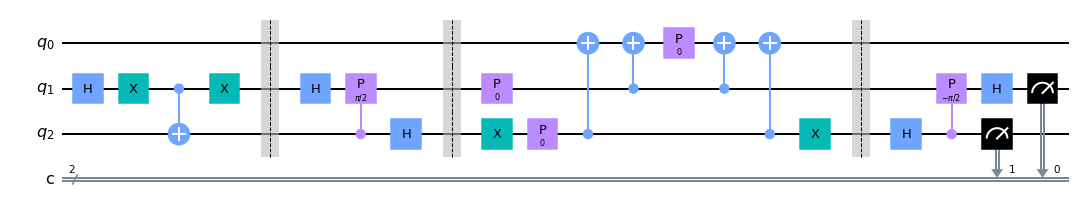

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from qiskit import IBMQ, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram, plot_bloch_vector

qc = QuantumCircuit(3,2)

#Initialisation

qc.h(1)
qc.x(1)
qc.cx(1,2)
qc.x(1)

qc.barrier()

#QFT

qc.h(1)
qc.cp(pi/2,2,1)
qc.h(2)

qc.barrier()


#Time Step
phi = 0

qc.p(phi,1)
qc.x(2)
qc.p(2*phi,2)
qc.cx(2,0)
qc.cx(1,0)
qc.p(2*phi,0)
qc.cx(1,0)
qc.cx(2,0)
qc.x(2)

qc.barrier()

#Inverse QFT

qc.h(2)
qc.cp(-pi/2,2,1)
qc.h(1)

#Measurement

qc.measure(1,0)
qc.measure(2,1)

print('Circuit')
qc.draw('mpl')


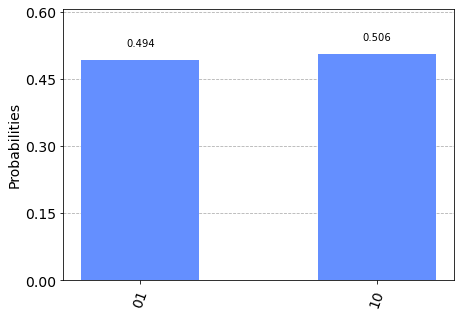

In [86]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 2048
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [83]:
#On the Quantum Computer

from qiskit import IBMQ
IBMQ.save_account('4ac326d8f5d016bd74f2fd772f0f5c1f11da22a9c83e718f6833e71b94602cd8382d13be3da151d07eb851060b3390dc631f0be893ad0ab9adf5e407dbe5a0a3')


configrc.store_credentials:WARNING:2020-10-28 13:08:59,220: Credentials already present. Set overwrite=True to overwrite.


In [71]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_5_yorktown')
job = execute(qc, backend=qcomp, shots=2048)

from qiskit.tools.monitor import job_monitor

job_monitor(job)

ibmqfactory.load_account:WARNING:2020-10-28 12:25:35,033: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


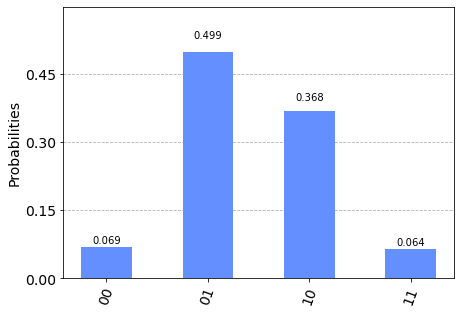

In [72]:
#At phi = 0

result = job.result()
plot_histogram(result.get_counts(qc))

In [74]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_5_yorktown')
job = execute(qc, backend=qcomp, shots=2048)

from qiskit.tools.monitor import job_monitor

job_monitor(job)

ibmqfactory.load_account:WARNING:2020-10-28 12:33:17,680: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


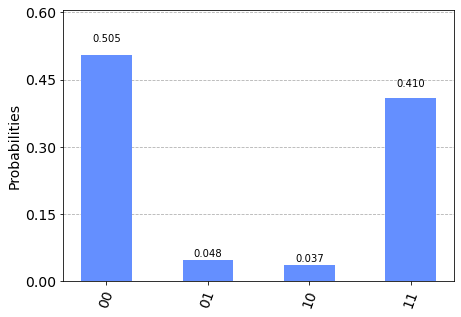

In [75]:
#At phi = pi

result = job.result()
plot_histogram(result.get_counts(qc))